This purpose of this project is to become more familiar with making a CNN in Tensorflow.  The aim is to differentiate between different forms of art and the data can be found at:  https://www.kaggle.com/thedownhill/art-images-drawings-painting-sculpture-engraving

As a note, there are a handful of corrupted imaged in the dataset that has to be removed before this will run.

In [291]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
mnist=tf.keras.datasets.mnist
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import time


In [283]:
img = load_img('dataset_updated/training_set/drawings/2051_mainfoto_05.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

In [284]:
#Check our normalization factor
print(np.max(x))

255.0


In [285]:
early_stopping_monitor = EarlyStopping(patience=2)

In [286]:
#shift data in various ways to make sure that the same image isn't seen repeatedly.  Also rescale the data.
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [287]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        'dataset_updated/training_set',  
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  
validation_generator = test_datagen.flow_from_directory(
        'dataset_updated/validation_set',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')  

Found 7721 images belonging to 6 classes.
Found 856 images belonging to 6 classes.


In [288]:
#Preview what the image distortion does:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
dense_layers=[0,1]
layer_sizes=[32, 64, 128]
conv_layers=[1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            name = str(conv_layer)+"_conv_"+str(layer_size)+"_nodes+"+str(dense_layer)+"_dense"+str(time.time())
            tensorboard = TensorBoard(log_dir='logs/'+str(name))
            
            print("Doing: ", name)
            
            model=Sequential()
            model.add(Conv2D(64, (3,3), input_shape=(150, 150, 3), padding='same'))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.2))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
                model.add(Dropout(0.2))

            model.add(Flatten())
            
            for l in range(dense_layer-1):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
                model.add(Dropout(0.2))

            #model.add(Dense(1))
            #model.add(Activation("sigmoid"))
            model.add(Dense(6))
            model.add(Activation("softmax"))

            model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
            model.fit_generator(
                    train_generator,
                    steps_per_epoch=2000 // batch_size,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_steps=800 // batch_size,
                    callbacks=[tensorboard, early_stopping_monitor]
            )
#model.save_weights('first_try.h5') 

Doing:  1_conv_32_nodes+0_dense1548668228.152905
Epoch 1/5


/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


125/125 [==============================] - 223s 2s/step - loss: 1.9514 - acc: 0.5415 - val_loss: 0.9890 - val_acc: 0.6650
Epoch 2/5
125/125 [==============================] - 177s 1s/step - loss: 0.8595 - acc: 0.6928 - val_loss: 0.8107 - val_acc: 0.7247
Epoch 3/5
125/125 [==============================] - 178s 1s/step - loss: 0.8212 - acc: 0.7235 - val_loss: 0.8699 - val_acc: 0.7247
Epoch 4/5
125/125 [==============================] - 179s 1s/step - loss: 0.7582 - acc: 0.7405 - val_loss: 0.7895 - val_acc: 0.7639
Epoch 5/5
 72/125 [================>.............] - ETA: 1:01 - loss: 0.7798 - acc: 0.7188

/Users/ian/.pyenv/versions/3.6.5/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


125/125 [==============================] - 165s 1s/step - loss: 0.7707 - acc: 0.7225 - val_loss: 1.0214 - val_acc: 0.6818
Doing:  2_conv_32_nodes+0_dense1548669227.567471
Epoch 1/5
125/125 [==============================] - 283s 2s/step - loss: 1.1907 - acc: 0.5156 - val_loss: 1.0655 - val_acc: 0.5720
Epoch 2/5
125/125 [==============================] - 250s 2s/step - loss: 0.9540 - acc: 0.6265 - val_loss: 0.9255 - val_acc: 0.6730
Epoch 3/5
125/125 [==============================] - 258s 2s/step - loss: 0.8211 - acc: 0.6895 - val_loss: 0.7390 - val_acc: 0.7298
Epoch 4/5
125/125 [==============================] - 250s 2s/step - loss: 0.8731 - acc: 0.6885 - val_loss: 0.8702 - val_acc: 0.6667
Epoch 5/5
125/125 [==============================] - 256s 2s/step - loss: 0.7827 - acc: 0.6998 - val_loss: 0.8679 - val_acc: 0.6875
Doing:  3_conv_32_nodes+0_dense1548670585.459349
Epoch 1/5
125/125 [==============================] - 286s 2s/step - loss: 1.2282 - acc: 0.4935 - val_loss: 0.9431 - val_

Checking TensorBoard, the best model is one with 2 convolutional layers with 64 nodes and no dense layers with an accuracy of about 0.75 and a validation loss of about 0.72.  All models look to still be improving past 5 epochs though, which was the cutoff due to the very long run time.

In [294]:
!pwd

/Users/ian/Documents/MachineLearning/ArtImages


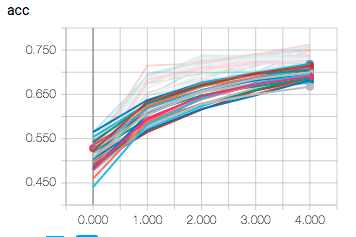

In [297]:
from IPython.display import Image
Image("art_acc.png")


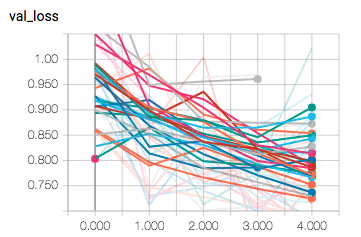

In [298]:
Image("art_val_loss.png")